In [61]:
import string
import numpy as np
import random
import matplotlib.pyplot as plt
import json
import itertools

In [2]:
alphabet = string.ascii_lowercase + " "
alphabet

'abcdefghijklmnopqrstuvwxyz '

In [3]:
def zero_approximation(data: string, n: int) -> string:
    return ''.join(random.choices(alphabet, k=n))

def generate_approximation(n: int, data: string, func: classmethod) -> string:
    return func(data, n)

In [4]:
n = 10000000
data = ''
approx = zero_approximation(data, n)

In [5]:
avg_len = np.mean([len(x) for x in approx.split()])
avg_len

26.944213742850426

## Zadanie 2

In [6]:
with open("norm_hamlet.txt") as f:
    hamlet = f.read()

In [7]:
countstats = [(char, hamlet.count(char)) for char in alphabet]
countstats

[('a', 9521),
 ('b', 1795),
 ('c', 2624),
 ('d', 5060),
 ('e', 14797),
 ('f', 2722),
 ('g', 2268),
 ('h', 8164),
 ('i', 8396),
 ('j', 111),
 ('k', 1165),
 ('l', 5625),
 ('m', 3880),
 ('n', 8156),
 ('o', 10846),
 ('p', 1853),
 ('q', 145),
 ('r', 7495),
 ('s', 8338),
 ('t', 11847),
 ('u', 4231),
 ('v', 1219),
 ('w', 3083),
 ('x', 174),
 ('y', 3189),
 ('z', 80),
 (' ', 31819)]

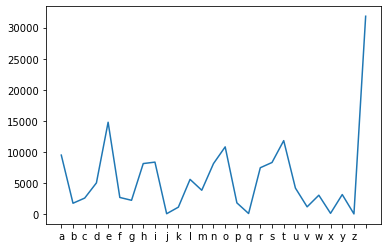

In [8]:
plt.plot([x[0] for x in countstats], [x[1] for x in countstats])

## Zadanie 3

In [9]:
occurrences_vector = [x[1]/len(hamlet) for x in countstats]
occurrences_vector

[0.060030390345705946,
 0.011317566502525174,
 0.016544453761908665,
 0.03190355794026595,
 0.09329583929686072,
 0.017162348757589704,
 0.014299855614332642,
 0.05147443617081644,
 0.05293720799732666,
 0.0006998606583734229,
 0.0073453843874327724,
 0.035465911741896436,
 0.02446359778818812,
 0.05142399576300574,
 0.06838458288935266,
 0.011683259459152728,
 0.0009142323915688859,
 0.047256357067646894,
 0.0525715150406991,
 0.07469593891666614,
 0.026676670680882454,
 0.007685857140154978,
 0.019438472160047415,
 0.0010970788698826631,
 0.02010680756353915,
 0.0005044040781069715,
 0.20062041701607158]

In [10]:
n = 10000
distribution = occurrences_vector
first_approx = \
    ''.join([alphabet[np.random.choice(np.arange(len(alphabet)), p=distribution)] for _ in range(n)])

first_approx_avg_len = np.mean([len(x) for x in first_approx.split()])
print(first_approx_avg_len)
print(first_approx[:500])

5.022627278441232
  oeau ununksed  azfsoab u hat nh  n el n criieh i f s dy smeaodeat vwo dor i ptrol eyomntdyua gitutm so  wdaireelttslevdieeutgcle  musyhurocwfl titsmtohe thwvhidehsromhiearnm or  c brhit  l n t e pnokieue  ee  ouaen ilnsgh  a taitasnlarbatesehhbr sn mwssoj ms    neetoniheitsdeshetlhtsreo    hiheaohrer ewodt i   te ltm keost r iiir noyb msl  o hashynn eethfwsteho  a c o atleolroogwgnntaaabcie inn bvwoufhendhyatotm is  i  puans  f mnaooeeetecttdir mobea g wtesaeohoeinxnbhat omavalti t satwtmcfrnp


## Zadanie 4

In [235]:
countstats.sort(key= lambda x: x[1], reverse=True)
top_letters = [x[0] for x in countstats[1:3]]

In [236]:
follow_count_matrix = np.zeros((len(alphabet),len(alphabet)))
for i, char in enumerate(hamlet[:-1]):
    mat_i = alphabet.index(char)
    mat_j = alphabet.index(hamlet[i+1])
    follow_count_matrix[mat_i,mat_j] += 1
follow_count_matrix

array([[0.000e+00, 9.900e+01, 2.480e+02, 3.500e+02, 5.000e+01, 5.600e+01,
        1.690e+02, 7.000e+00, 3.240e+02, 2.100e+01, 2.490e+02, 6.520e+02,
        3.450e+02, 1.953e+03, 0.000e+00, 1.150e+02, 0.000e+00, 1.013e+03,
        7.510e+02, 1.413e+03, 1.090e+02, 3.730e+02, 1.060e+02, 1.000e+01,
        4.580e+02, 1.300e+01, 6.370e+02],
       [1.100e+02, 1.100e+01, 0.000e+00, 0.000e+00, 5.930e+02, 0.000e+00,
        0.000e+00, 1.000e+00, 5.000e+01, 5.000e+00, 0.000e+00, 1.910e+02,
        0.000e+00, 0.000e+00, 1.530e+02, 0.000e+00, 0.000e+00, 1.510e+02,
        2.600e+01, 1.500e+01, 3.350e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        1.250e+02, 0.000e+00, 2.900e+01],
       [2.970e+02, 0.000e+00, 2.600e+01, 0.000e+00, 5.040e+02, 0.000e+00,
        0.000e+00, 4.610e+02, 7.600e+01, 0.000e+00, 1.600e+02, 8.900e+01,
        0.000e+00, 0.000e+00, 5.590e+02, 0.000e+00, 3.000e+00, 1.270e+02,
        5.000e+00, 1.620e+02, 8.700e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        2.400e+01, 0.000e+00

In [237]:
countstats_dict = dict(countstats)
follow_prob_matrix = np.zeros((len(alphabet),len(alphabet)))
for i in range(len(alphabet)):
    for j in range(len(alphabet)):
        follow_prob_matrix[i,j] = follow_count_matrix[i,j]/countstats_dict[alphabet[i]]
print(np.sum(follow_prob_matrix, axis=1))
follow_prob_matrix

[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         0.99996857]


array([[0.00000000e+00, 1.03980674e-02, 2.60476841e-02, 3.67608444e-02,
        5.25154921e-03, 5.88173511e-03, 1.77502363e-02, 7.35216889e-04,
        3.40300389e-02, 2.20565067e-03, 2.61527151e-02, 6.84802017e-02,
        3.62356895e-02, 2.05125512e-01, 0.00000000e+00, 1.20785632e-02,
        0.00000000e+00, 1.06396387e-01, 7.88782691e-02, 1.48408781e-01,
        1.14483773e-02, 3.91765571e-02, 1.11332843e-02, 1.05030984e-03,
        4.81041907e-02, 1.36540279e-03, 6.69047369e-02],
       [6.12813370e-02, 6.12813370e-03, 0.00000000e+00, 0.00000000e+00,
        3.30362117e-01, 0.00000000e+00, 0.00000000e+00, 5.57103064e-04,
        2.78551532e-02, 2.78551532e-03, 0.00000000e+00, 1.06406685e-01,
        0.00000000e+00, 0.00000000e+00, 8.52367688e-02, 0.00000000e+00,
        0.00000000e+00, 8.41225627e-02, 1.44846797e-02, 8.35654596e-03,
        1.86629526e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        6.96378830e-02, 0.00000000e+00, 1.61559889e-02],
       [1.13185976e-01

In [238]:
for letter in top_letters:
    print(f"\n{letter}:")
    print(json.dumps(dict(zip(alphabet, follow_prob_matrix[alphabet.index(letter)]))))


e:
{"a": 0.06798675407177131, "b": 0.0010813002635669392, "c": 0.014665134824626613, "d": 0.028924782050415626, "e": 0.03960262215313915, "f": 0.007569101844968575, "g": 0.0033790633236466853, "h": 0.001351625329458674, "i": 0.010339933770358857, "j": 0.0001351625329458674, "k": 0.0010813002635669392, "l": 0.04237345407852943, "m": 0.01953098601067784, "n": 0.09035615327431236, "o": 0.0017571129282962763, "p": 0.008988308440900183, "q": 0.0010813002635669392, "r": 0.12725552476853416, "s": 0.06805433533824425, "t": 0.04075150368317902, "u": 0.003176319524227884, "v": 0.011353652767452862, "w": 0.0053389200513617625, "x": 0.009934446171521255, "y": 0.0120294654321822, "z": 0.00020274379941880111, " ": 0.3816989930391296}

t:
{"a": 0.024900818772685067, "b": 8.44095551616443e-05, "c": 0.004304887313243859, "d": 0.0, "e": 0.06558622436059762, "f": 0.0010129146619397315, "g": 0.0, "h": 0.33620325820882924, "i": 0.051911876424411245, "j": 0.0, "k": 0.0, "l": 0.01139528994682198, "m": 0.000

## Zadanie 5

### Markov first

In [240]:
n = 10000
markov_first_approx = 't'
for i in range(n):
    alphabet_index = alphabet.index(markov_first_approx[i])
    probs = follow_prob_matrix[alphabet_index]
    probs_normed = probs/probs.sum() # normalize so that the vector sums to 1
    markov_first_approx += \
        alphabet[np.random.choice(np.arange(len(alphabet)), p=probs_normed)]

markov_first_approx_avg_len = np.mean([len(x) for x in markov_first_approx.split()])
print(markov_first_approx_avg_len)
print(markov_first_approx[:500])

3.902941176470588
thad ave t til gi my rkimusthiedostoe thilvin utlk ugr be andanar yryospat as w il cave wengen oulicy ncerth ngarerla be ishe ar brdeye ory med t l s iore hang arerer and s lprke athis pe e ckin s tand t ncatzaimaunoris sthinolco my sy l i h i iee my f burontrer e iggl t hist others ndor prm ay oud as n cadcit achemancan ocon housbellahinen o l wo hy heneme hed so t br icrnthoura t yoday hr beverdome thyon owal brinouthewinchero whe awh yometis thance my oacowincom wes d ftis pev tit nsthais ams


### Markov third

In [223]:
n = len(alphabet)
thirds_permutations = [''.join(perm) for perm in list(itertools.product(alphabet,repeat=3))]
thirds_follow_count_matrix = np.zeros((n ** 3, n))
for i, char in enumerate(hamlet[:-3]):
    mat_i = thirds_permutations.index(hamlet[i:i+3])
    mat_j = alphabet.index(hamlet[i+3])
    thirds_follow_count_matrix[mat_i,mat_j] += 1
thirds_follow_count_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [209]:
thirds_follow_prob_matrix = np.zeros((n ** 3, n))
for i in range(n ** 3):
    for j in range(n):
        prob = thirds_follow_count_matrix[i,j]/np.sum(thirds_follow_count_matrix[i])
        thirds_follow_prob_matrix[i,j] = 0 if np.isnan(prob) else prob
print(np.sum(thirds_follow_prob_matrix, axis=1))
thirds_follow_prob_matrix

C:\Users\alext\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


[0. 0. 0. ... 0. 0. 0.]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [241]:
n = 10000
markov_third_approx = 'the'
for i in range(n):
    third_index = thirds_permutations.index(markov_third_approx[i:i+3])
    probs = thirds_follow_prob_matrix[third_index]
    probs_normed = probs/probs.sum() # normalize so that the vector sums to 1
    markov_third_approx += \
        alphabet[np.random.choice(np.arange(len(alphabet)), p=probs_normed)]

markov_third_approx_avg_len = np.mean([len(x) for x in markov_first_approx.split()])
print(markov_third_approx_avg_len)
print(markov_third_approx[:500])

3.902941176470588
the casinession you many love grapprestian it s ence leave and wings to he deardon of heave head we woman us speachee chrison d for fair t and shought in and dozen how fatnestications fish glow thou feelse enes crant ay from in town no thee most noration cour did ones you case what make she deview and play stubble poisenched right alas any summons at this the are such alream so ratenanto a cry would we work form but tood in grade did a blook what we love to do you head by heliar rappartinest wha


In [ ]:
n = len(alphabet)
thirds_permutations = [''.join(perm) for perm in list(itertools.product(alphabet,repeat=3))]
thirds_follow_count_matrix = np.zeros((n ** 3, n))
for i, char in enumerate(hamlet[:-3]):
    mat_i = thirds_permutations.index(hamlet[i:i+3])
    mat_j = alphabet.index(hamlet[i+3])
    thirds_follow_count_matrix[mat_i,mat_j] += 1
thirds_follow_count_matrix

thirds_follow_prob_matrix = np.zeros((n ** 3, n))
for i in range(n ** 3):
    for j in range(n):
        prob = thirds_follow_count_matrix[i,j]/np.sum(thirds_follow_count_matrix[i])
        thirds_follow_prob_matrix[i,j] = 0 if np.isnan(prob) else prob
print(np.sum(thirds_follow_prob_matrix, axis=1))
thirds_follow_prob_matrix

n = 10000
markov_third_approx = 'the'
for i in range(n):
    third_index = thirds_permutations.index(markov_third_approx[i:i+3])
    probs = thirds_follow_prob_matrix[third_index]
    probs_normed = probs/probs.sum() # normalize so that the vector sums to 1
    markov_third_approx += \
        alphabet[np.random.choice(np.arange(len(alphabet)), p=probs_normed)]

markov_third_approx_avg_len = np.mean([len(x) for x in markov_first_approx.split()])
print(markov_third_approx_avg_len)
print(markov_third_approx[:500])